## Yatsa Data Analytics

Yatsa is company that helps you track and manage your assets better. 
This notebook is a quick look at the data that Yatsa collects from their user's assets and the trips the assets being tracked have made. The goal of the analytics is to provide insights from the data and answer the following business questions:
- What is the average distance travelled by vehicles in a day, week or month?
- What are the most common destination for vehicles and how frequent do they travel to  these destinations?

### Extra
- Any trends in driver behaviour for example speeding?
- Any pattern or trends in the types of trips made by vehicles for example: do smaller vehicles travel through smaller distances.

`trips.json` file is too large to be uploaded to github. It can be download from [here](https://drive.google.com/drive/folders/1cVddbKWqv8B9NF6B0ALS3Rv4vZAxEi1Z?usp=share_link)

In [1]:
import pandas as pd
assets = pd.read_json('Data/assets.json')

In [2]:
assets.head()

,id,make,model,year
0,QRmYjfT,TOYOTA Ractis 1.0,Ractis 1.0,2006.0
1,DpXMzg3,Lexus CT 200h,CT 200h,NaN
2,4tQe9sV,Honda Odyssey,Odyssey,NaN
3,x2LJWsl,MITSUBISHI Lancer Cedia LA-CS2A,Lancer Cedia LA-CS2A,2005.0
4,eH0O4bf,Nissan,Note,2011.0


In [3]:
import json

In [2]:
with open('Data/trips.json') as f:
    trips = json.load(f)

In [8]:
print(trips[0])

{'id': '35Ldjpf', 'created': '2022-03-14T17:31:51.003+00:00', 'asset_id': '0ROajub', 'origin': {'latitude': -1.043220043182373, 'longitude': 37.067928314208984, 'time_stamp': '2022-03-14T17:31:47+00:00', 'address': 'Thika Garissa Highway, Total, Thika, Kenya', 'odometer': None}, 'destination': {'latitude': -1.041213035583496, 'longitude': 37.09260177612305, 'time_stamp': '2022-03-14T17:54:07+00:00', 'address': 'Kenyatta Highway, Thika, Kiambu County, Kenya', 'odometer': None}, 'distance': 4321.65, 'points': [{'bearing': 0.0, 'location': {'latitude': -1.0429808391339757, 'longitude': 37.06797081001906}, 'original_index': 0, 'place_id': 'ChIJZdR1aZNOLxgRKyV34jTxzi8'}, {'bearing': -79.92785342956121, 'location': {'latitude': -1.0429532741480045, 'longitude': 37.06781559845453}, 'original_index': 1, 'place_id': 'ChIJZdR1aZNOLxgRKyV34jTxzi8'}, {'bearing': -79.92785060439225, 'location': {'latitude': -1.0429239, 'longitude': 37.067650199999996}, 'original_index': 0, 'place_id': 'ChIJZdR1aZNO

In [36]:
columns = []
columns.append('id')
columns.append('created')
columns.append('asset_id')
columns.append('distance')
data_origin = trips[3]['origin']
data_destination = trips[4]['destination']
data_points = trips[6]['points'][0]
for key in data_origin.keys():
    if key not in columns:
        columns.append('origin_' + key)
for key in data_destination.keys():
    if key not in columns:
        columns.append('destination_' + key)
for k, v in data_points.items():
    if k not in columns:
        if k == 'location':
            for key in v.keys():
                if key not in columns:
                    columns.append('point_' + key)
        else:
            columns.append('point_' + k)
print(columns)


['id', 'created', 'asset_id', 'distance', 'origin_latitude', 'origin_longitude', 'origin_time_stamp', 'origin_address', 'origin_odometer', 'destination_latitude', 'destination_longitude', 'destination_time_stamp', 'destination_address', 'destination_odometer', 'point_bearing', 'point_latitude', 'point_longitude', 'point_original_index', 'point_place_id']


In [5]:
# trips_df = pd.DataFrame(columns=columns)
# fill the dataframe columns with trips data 

In [43]:
#trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.04322,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",None,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",None,0.0,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",None,0.0,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.30549,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.75983,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",None,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",None,0.0,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


`Load` data into a Pandas dataframe from the CSV file in the `Data` folder. Do not run the two code cells below as it will take much time to execute.

In [42]:
for i, trip in enumerate(trips):
    trips_df.loc[i, 'id'] = trip['id']
    trips_df.loc[i, 'created'] = trip['created']
    trips_df.loc[i, 'asset_id'] = trip['asset_id']
    trips_df.loc[i, 'distance'] = trip['distance']
    for key, value in trip['origin'].items():
        trips_df.loc[i, 'origin_' + key] = value
    for key, value in trip['destination'].items():
        trips_df.loc[i, 'destination_' + key] = value
    for i, v in enumerate(trip['points']):
        for key, value in v.items():
            if key == 'location':
                for k, v in value.items():
                    trips_df.loc[i, 'point_' + k] = v
            else:
                trips_df.loc[i, 'point_' + key] = value

In [44]:
# save the trips_df to csv file
trips_df.to_csv('Data/trips_df.csv', index=False)

In [7]:
# save the assets_df to csv file
assets.to_csv('Data/assets_df.csv', index=False)

Execute the code cells below to start working with trips data.

In [6]:
trips_df = pd.read_csv('Data/trips_df.csv')

In [8]:
trips_df.shape

(6703, 19)

In [9]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,origin_odometer,destination_latitude,destination_longitude,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,0.0,4804.000000,4804.000000,0.0,6703.000000,6703.000000,6703.000000,6703.000000
mean,11241.547325,-1.033155,36.911776,NaN,-1.033224,36.911758,NaN,-15.064304,-0.404014,36.305245,6.828883
std,20407.447419,0.433675,0.411567,NaN,0.435225,0.411621,NaN,74.698946,0.846147,0.891082,20.025799
min,101.510000,-3.229457,34.215324,NaN,-3.328162,34.217648,NaN,-180.000000,-1.295174,34.998313,0.000000
25%,1634.500000,-1.248051,36.824792,NaN,-1.249770,36.824720,NaN,-53.565599,-1.040912,35.256035,0.000000
50%,4962.310000,-1.126192,36.995655,NaN,-1.126177,36.993961,NaN,0.000000,-1.036796,37.051986,0.000000
75%,11809.925000,-1.051952,37.092146,NaN,-1.051691,37.092073,NaN,0.000000,0.521471,37.072456,0.000000
max,342478.600000,1.256370,40.124302,NaN,1.256327,40.126652,NaN,180.000000,1.024317,37.094406,99.000000


In [52]:
trips_df.dtypes

id                         object
created                    object
asset_id                   object
distance                  float64
origin_latitude           float64
origin_longitude          float64
origin_time_stamp          object
origin_address             object
origin_odometer           float64
destination_latitude      float64
destination_longitude     float64
destination_time_stamp     object
destination_address        object
destination_odometer      float64
point_bearing             float64
point_latitude            float64
point_longitude           float64
point_original_index        int64
point_place_id             object
dtype: object

In [11]:
assets.shape

(34, 4)

In [10]:
assets.isnull().sum()

id        0
make      0
model    13
year     15
dtype: int64

In [12]:
trips_df.isnull().sum()

id                        1899
created                   1899
asset_id                  1899
distance                  1899
origin_latitude           1899
origin_longitude          1899
origin_time_stamp         1899
origin_address            1900
origin_odometer           6703
destination_latitude      1899
destination_longitude     1899
destination_time_stamp    1899
destination_address       1900
destination_odometer      6703
point_bearing                0
point_latitude               0
point_longitude              0
point_original_index         0
point_place_id               0
dtype: int64

In [55]:
# drop the columns whose entire column is null
trips_df.dropna(axis=1, how='all', inplace=True)

In [56]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,6703.000000,6703.000000,6703.000000,6703.000000
mean,11241.547325,-1.033155,36.911776,-1.033224,36.911758,-15.064304,-0.404014,36.305245,6.828883
std,20407.447419,0.433675,0.411567,0.435225,0.411621,74.698946,0.846147,0.891082,20.025799
min,101.510000,-3.229457,34.215324,-3.328162,34.217648,-180.000000,-1.295174,34.998313,0.000000
25%,1634.500000,-1.248051,36.824792,-1.249770,36.824720,-53.565599,-1.040912,35.256035,0.000000
50%,4962.310000,-1.126192,36.995655,-1.126177,36.993961,0.000000,-1.036796,37.051986,0.000000
75%,11809.925000,-1.051952,37.092146,-1.051691,37.092073,0.000000,0.521471,37.072456,0.000000
max,342478.600000,1.256370,40.124302,1.256327,40.126652,180.000000,1.024317,37.094406,99.000000


In [57]:
# limit the trips_df to 4804 rows
trips_df = trips_df.iloc[:4804, :]

In [58]:
trips_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            1
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       1
point_bearing             0
point_latitude            0
point_longitude           0
point_original_index      0
point_place_id            0
dtype: int64

In [59]:
trips_df[trips_df['origin_address'].isnull() | trips_df['destination_address'].isnull()]

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
922,v0Wgz5c,2022-11-06T01:11:56.532+00:00,QRmYjfT,862.05,-1.18568,36.744983,2022-11-06T01:11:50+00:00,NaN,-1.185388,36.748775,2022-11-06T01:16:28+00:00,NaN,0.0,-1.035254,37.075637,0,ChIJI7NjvYVOLxgRfpELFek-IkY


In [60]:
trips_df.dropna(subset=['origin_address', 'destination_address'], inplace=True)

In [62]:
trips_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            0
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       0
point_bearing             0
point_latitude            0
point_longitude           0
point_original_index      0
point_place_id            0
dtype: int64

In [63]:
trips_df['distance'].mean()

11243.70836976889

In [64]:
trips_df['created'] = pd.to_datetime(trips_df['created'])
trips_df['created_day'] = trips_df['created'].dt.day
trips_df['created_week'] = trips_df['created'].dt.week
trips_df['created_month'] = trips_df['created'].dt.month

<ipython-input-64-d8343b90f6b0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  trips_df['created_week'] = trips_df['created'].dt.week


In [68]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,created_day,created_week,created_month
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,14,11,3
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,7,10,3
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,7,10,3
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,7,10,3
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,7,10,3


In [65]:
trips_df.groupby('created_day')['id'].count()

created_day
1     210
2     201
3     189
4     209
5     178
6     203
7     152
8     101
9     139
10    137
11    168
12    132
13    122
14    127
15    128
16    119
17    155
18    132
19    118
20    137
21    156
22    151
23    180
24    171
25    192
26    179
27    203
28    211
29    101
30    129
31     73
Name: id, dtype: int64

In [66]:
trips_df.groupby('created_day')['distance'].mean()

created_day
1     12452.639810
2     12537.244677
3     10486.054868
4     11609.014928
5     10195.788427
6     10993.693892
7      9424.987105
8     10387.129406
9     10067.539137
10    11865.382993
11    12721.543690
12    10900.014167
13     8156.797541
14    12542.407402
15     9036.293750
16     9529.035882
17     9120.308387
18     9891.923106
19    11143.167034
20    12240.166277
21    12084.120577
22    12127.379470
23    10238.344667
24    10910.555322
25    14435.754688
26    10000.906760
27     9929.736749
28    13694.864123
29    11908.901683
30    15660.271705
31     8578.013151
Name: distance, dtype: float64

In [67]:
trips_df.groupby('created_week')['distance'].mean()

created_week
1     11314.148857
2      5040.174857
3     10277.398500
4     13842.073500
5      8740.816307
6      7984.538346
7      9636.384235
8      9625.121792
9     10890.477687
10    12596.259706
11     4321.650000
12     6645.122941
13     1712.585000
17     9102.640270
18    10128.154479
19    16731.929545
20    17654.280909
21     7760.119394
22    10630.829167
23    21546.111500
24    21153.024400
25    16391.706667
26    29978.595000
27    15471.029804
28     8543.555000
29     5796.229000
30     4166.194000
31    17931.975000
32     1716.628000
33     3728.954000
34     8331.772353
35     4842.061563
36     8606.825714
37     3658.766383
38     7815.842833
39    18382.953380
40     7648.293947
41    14536.382925
42    13435.137679
43     8315.178161
44    10738.630893
45     6661.445648
46     8716.652707
47    15826.582831
48    15858.567615
49    15139.448235
50    11032.953871
51    17455.789180
52     9614.624324
Name: distance, dtype: float64

In [69]:
trips_df.groupby('created_month')['distance'].mean()

created_month
1     10762.353975
2      9002.992650
3     11522.344992
4      7660.103898
5     12837.588539
6     21226.067136
7     16893.984600
8      6251.707179
9      9522.650697
10    11883.782965
11    11602.082706
12    13755.635497
Name: distance, dtype: float64

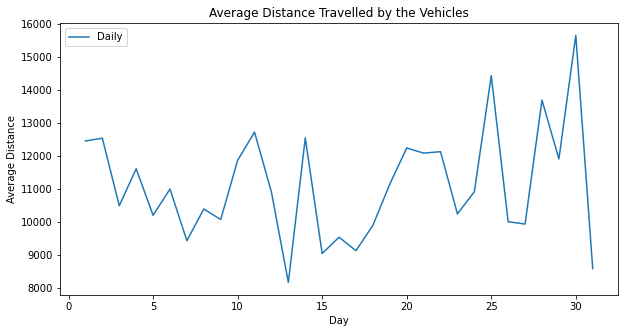

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_day')['distance'].mean(), label='Daily')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

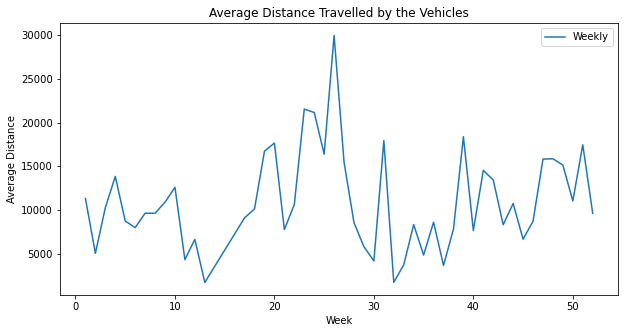

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_week')['distance'].mean(), label='Weekly')
plt.legend()
plt.xlabel('Week')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

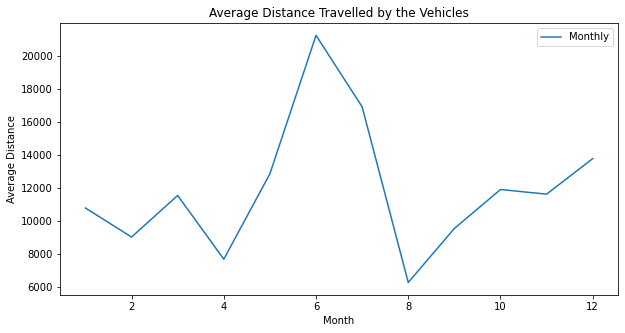

In [75]:
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_month')['distance'].mean(), label='Monthly')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Distance')
plt.title('Average Distance Travelled by the Vehicles')
plt.show()

In [78]:
trips_df['destination_address'].value_counts().head(10)

Thika, Kiambu County, Kenya                                             466
Ruiru, Kiambu County, Kenya                                             181
Kiandutu Slums, Thika, Kiambu County, Kenya                             175
A3, Thika, Kiambu County, Kenya                                         158
Super Highway, Ruiru, Kenya                                             123
Kianyaga, Kirinyaga County, Kenya                                       116
Eastern By Pass, Ruiru, Kiambu County, Kenya                            109
Makongeni, Thika, Kiambu County, Kenya                                  106
Kiganjo - British American Tobacco Road, Thika, Kiambu County, Kenya     88
Mitero Road, Ndathi, Nyeri County, Kenya                                 78
Name: destination_address, dtype: int64

In [79]:
# How frequently do the vehicles travel to the common origin address for the trips
trips_df[trips_df['destination_address'] == 'Thika, Kiambu County, Kenya'].value_counts()

id       created                           asset_id  distance  origin_latitude  origin_longitude  origin_time_stamp          origin_address                                                        destination_latitude  destination_longitude  destination_time_stamp     destination_address          point_bearing  point_latitude  point_longitude  point_original_index  point_place_id               created_day  created_week  created_month
00u06no  2023-02-28 14:37:23.549000+00:00  3XBsRFw   14689.55  -1.041613        37.066196         2023-02-28T14:37:20+00:00  A3, Thika, Kiambu County, Kenya                                       -1.035346             37.048599              2023-02-28T16:30:40+00:00  Thika, Kiambu County, Kenya  -46.558933      0.584230       35.216301        0                     ChIJp4RwjH8HgRcRdVasIVNh5WI  28           9             2                1
hQFSnFE  2022-12-31 17:50:14.072000+00:00  86sWwU3   1879.70   -1.062752        37.118866         2022-12-31T17:50:12+00:00

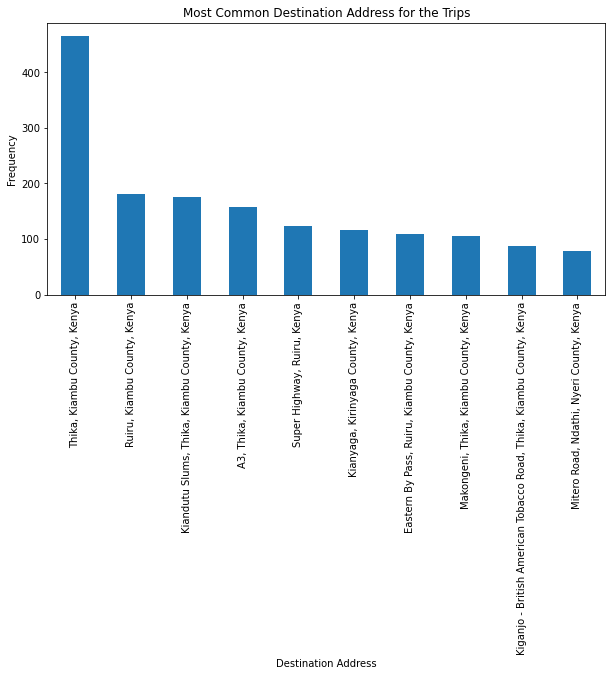

In [84]:
# Visualization to represent the most common destination address for the trips
plt.figure(figsize=(10, 5))
trips_df['destination_address'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Destination Address')
# plt.xticks(rotation=30)
plt.ylabel('Frequency')
plt.title('Most Common Destination Address for the Trips')
plt.show()

In [93]:
trips_df['origin_time_stamp'] = pd.to_datetime(trips_df['origin_time_stamp'])
trips_df['destination_time_stamp'] = pd.to_datetime(trips_df['destination_time_stamp'])

In [96]:
# create a column named average_speed to represent the average speed of the vehicles during the trips
trips_df['duration_seconds'] = (trips_df['destination_time_stamp'] - trips_df['origin_time_stamp']).dt.total_seconds()
trips_df['average_speed'] = trips_df['distance'] /trips_df['duration_seconds']

In [97]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,...,point_latitude,point_longitude,point_original_index,point_place_id,created_day,created_week,created_month,duration,duration_seconds,average_speed
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2023-03-19 17:31:47,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,...,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,14,11,3,0 days 00:22:20,1340.0,3.225112
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-19 08:53:51,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,...,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,7,10,3,0 days 01:19:56,4796.0,5.150801
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-19 06:40:48,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,...,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,7,10,3,0 days 01:44:16,6256.0,4.905574
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-19 05:12:26,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,...,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,7,10,3,0 days 01:17:27,4647.0,5.295748
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-19 03:15:15,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,...,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,7,10,3,0 days 01:44:16,6256.0,4.538956


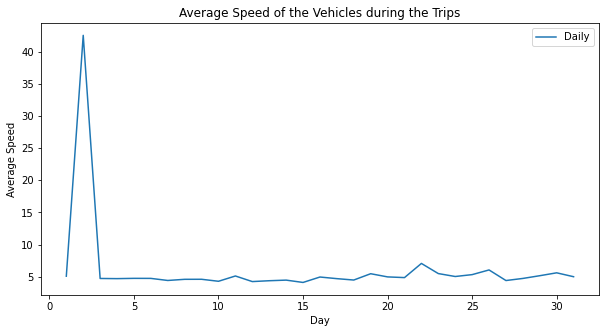

In [98]:
# Identify any trends in the average speed of the vehicles during the trips over time (day, week, month)
plt.figure(figsize=(10, 5))
plt.plot(trips_df.groupby('created_day')['average_speed'].mean(), label='Daily')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Average Speed')
plt.title('Average Speed of the Vehicles during the Trips')
plt.show()

In [99]:
# save the trips_df to csv file
trips_df.to_csv('Data/trips_df_refined.csv', index=False)